# Módulo 10 atividade 1

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.


#### Tratamento

In [2]:
filepath = 'https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/Mo%CC%81dulo%2010%20-%20Descritiva%20II%20-%20Ana%CC%81lise%20descritiva%20para%20resposta%20conti%CC%81nua/database/Profissa%CC%83o-%20Cientista%20de%20Dados_M10_support%20material.csv'
df = pd.read_csv(filepath_or_buffer=filepath)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
df.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'mau', 'renda'],
      dtype='object')

In [4]:
df.shape

(15000, 15)

In [5]:
df[df.loc[:,'tempo_emprego'] == 0]

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda


In [6]:
df.isna().sum()

data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

In [7]:
df.fillna(0, inplace=True)

In [8]:
df[df.loc[:,'tempo_emprego'] == 0]

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
12,2015-01-01,5090,M,True,True,2,Pensionista,Primário,Casado,Casa,60,0.0,4.0,False,5114.70
19,2015-01-01,1860,M,True,True,0,Pensionista,Superior completo,Casado,Casa,64,0.0,2.0,False,4501.53
26,2015-01-01,3453,F,False,True,1,Pensionista,Secundário,Casado,Casa,56,0.0,3.0,False,2053.04
27,2015-01-01,2317,F,False,True,0,Pensionista,Secundário,Casado,Casa,65,0.0,2.0,False,6714.39
30,2015-01-01,13799,F,True,False,0,Pensionista,Primário,Casado,Casa,64,0.0,2.0,False,1350.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,2016-03-01,6998,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,65,0.0,1.0,False,2880.59
14975,2016-03-01,6990,F,False,True,0,Pensionista,Superior incompleto,Viúvo,Casa,66,0.0,1.0,False,4625.11
14977,2016-03-01,307,F,False,False,0,Pensionista,Superior completo,Viúvo,Casa,59,0.0,1.0,False,1265.07
14988,2016-03-01,15110,F,False,True,0,Pensionista,Secundário,Casado,Casa,51,0.0,2.0,False,853.98


#### 1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

Variáveis Quantitativas: qtd_filhos, idade, tempo_emprego, qt_pessoas_residencia, renda

In [16]:
quantitativas = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'sexo']
ex_1 = df[quantitativas]

In [17]:
ex_1.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo
0,1,36,3.575342,3.0,3369.24,F
1,0,42,0.860274,2.0,6096.14,M
2,2,31,8.065753,4.0,5658.98,M
3,0,50,1.208219,2.0,7246.69,F
4,0,52,13.873973,2.0,4017.37,M


* Matriz de Dispersão

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

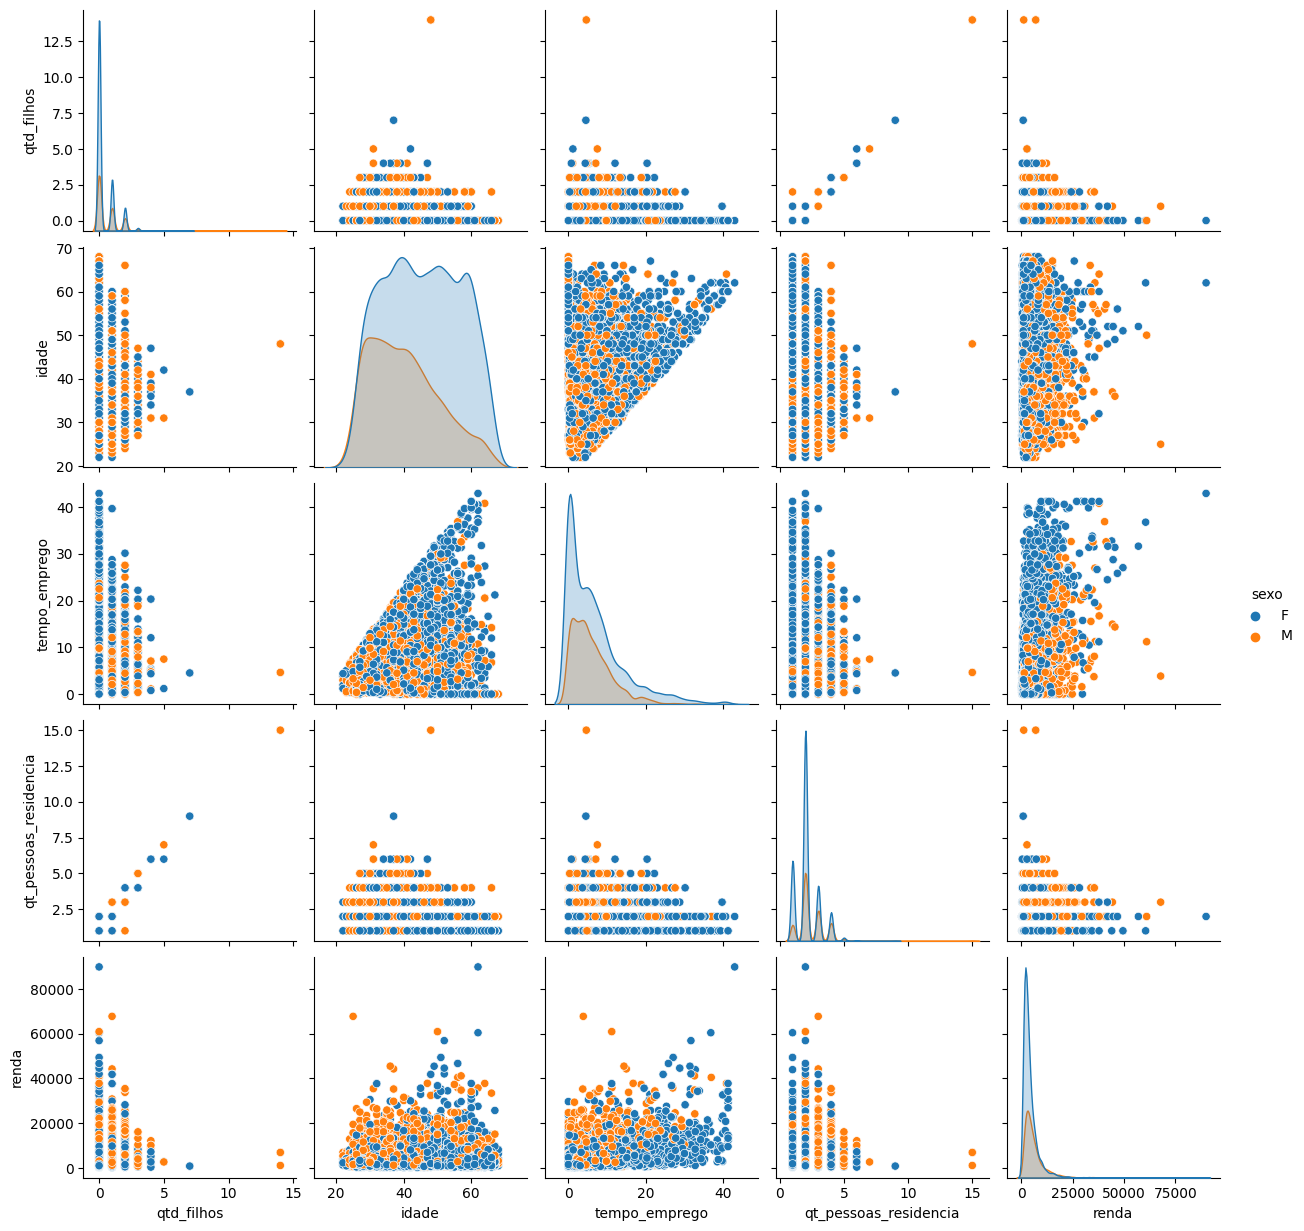

In [18]:
plt.rc('figure', figsize=(5,5))
sns.pairplot(ex_1, hue='sexo')

* Conforme o tempo de emprego aumenta a idade aumenta;
* Renda bem distribuída em relação a idade e tempod e emprego em geral.

In [22]:
ex_1.drop('sexo', axis=1, inplace=True)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_4088\135636367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_1.drop('sexo', axis=1, inplace=True)


In [23]:
ex_1.columns

Index(['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda'],
      dtype='object')

In [24]:
ex_1.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,0.034497,0.896488,0.009567
idade,-0.364303,1.000000,-0.040861,-0.338805,0.042570
tempo_emprego,0.034497,-0.040861,1.000000,0.040532,0.388404
qt_pessoas_residencia,0.896488,-0.338805,0.040532,1.000000,0.020977
renda,0.009567,0.042570,0.388404,0.020977,1.000000


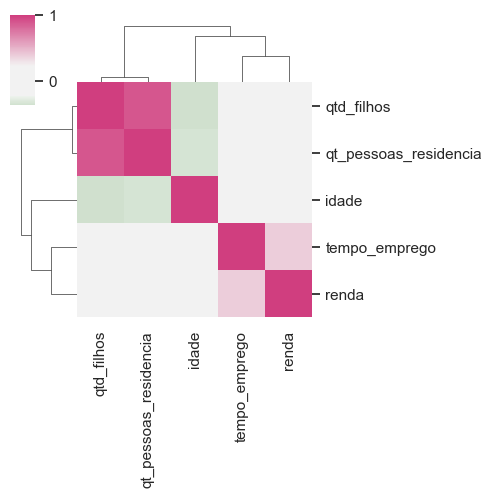

In [29]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(ex_1.corr(), figsize=(5, 5), center = 0, cmap=cmap)

#### 2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


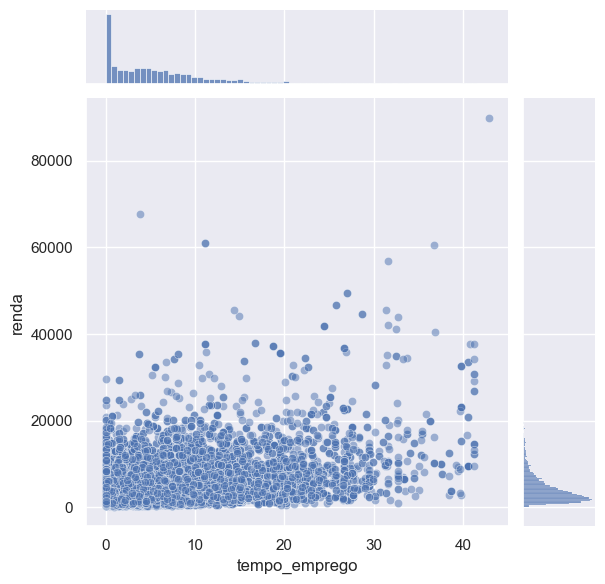

In [30]:
sns.jointplot(data=ex_1, 
              x="tempo_emprego", 
              y="renda", 
              alpha=0.5)

#### 3) Na sua aopinião, há outliers na variável renda?

R: Sim, há outliers na variável renda. Como visto, Apenas uma pessoa com +40 anos de experiência ganha em torno de 80.000 reais. Há outros outliers nesta análise quando se trata de maior tempo de emprego para  maiores salários e também um tempo de emprego relativamente baixo para um grande salário. Então, concluisse que para diferentes faixas de tempo de emprego, há outliers.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

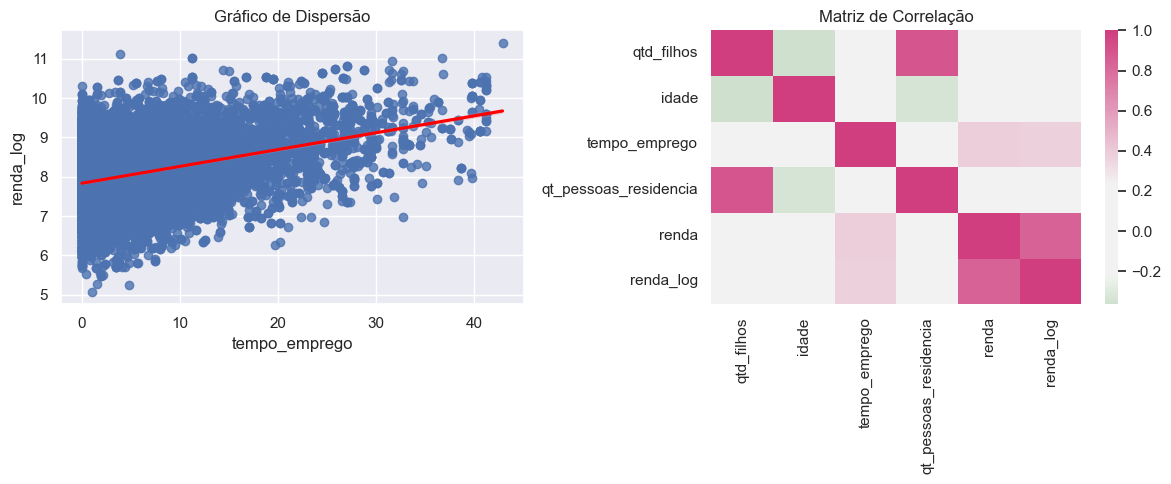

In [46]:
# Configurando Subplots para análise
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#Adicionando o LOG
ex_4 = ex_1.copy()
ex_4['renda_log'] = np.log(ex_4['renda'])

#Criando gráfico de dispersão
cor_da_linha='red'
_ = sns.regplot(x='tempo_emprego', y='renda_log', data=ex_4, line_kws={"color": cor_da_linha}, ax=axs[0])
axs[0].set_title('Gráfico de Dispersão')

#Criando matriz de Correlação
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.heatmap(ex_4.corr(), ax=axs[1], center=0, cmap=cmap)
axs[1].set_title('Matriz de Correlação')

plt.tight_layout()

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

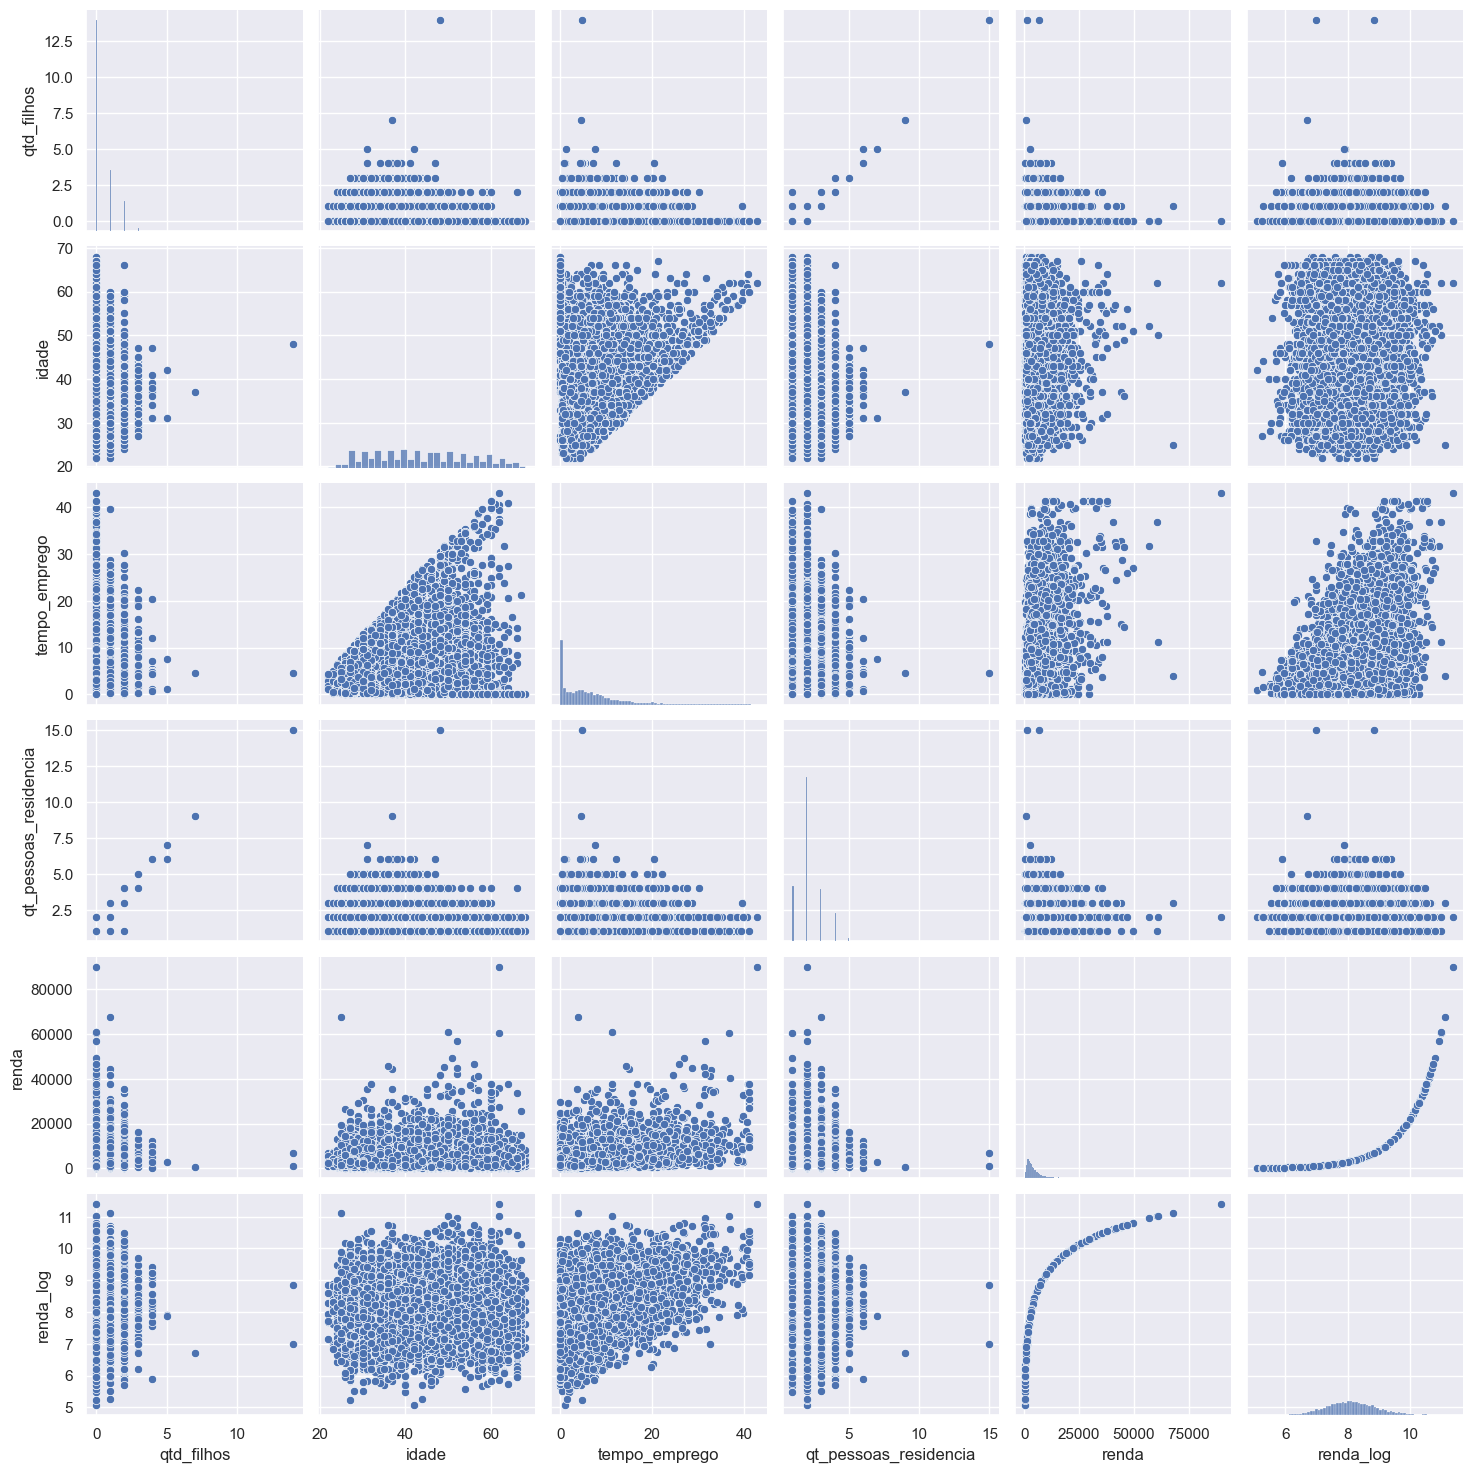

In [48]:
plt.rc('figure', figsize=(5,5))
sns.pairplot(ex_4)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Melhorou.